In [20]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost
%pip install -q hpbandster ConfigSpace


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may ne

# Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('Concrete_Compressive_Strength.csv')

In [3]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
data.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# visualizing Relationships

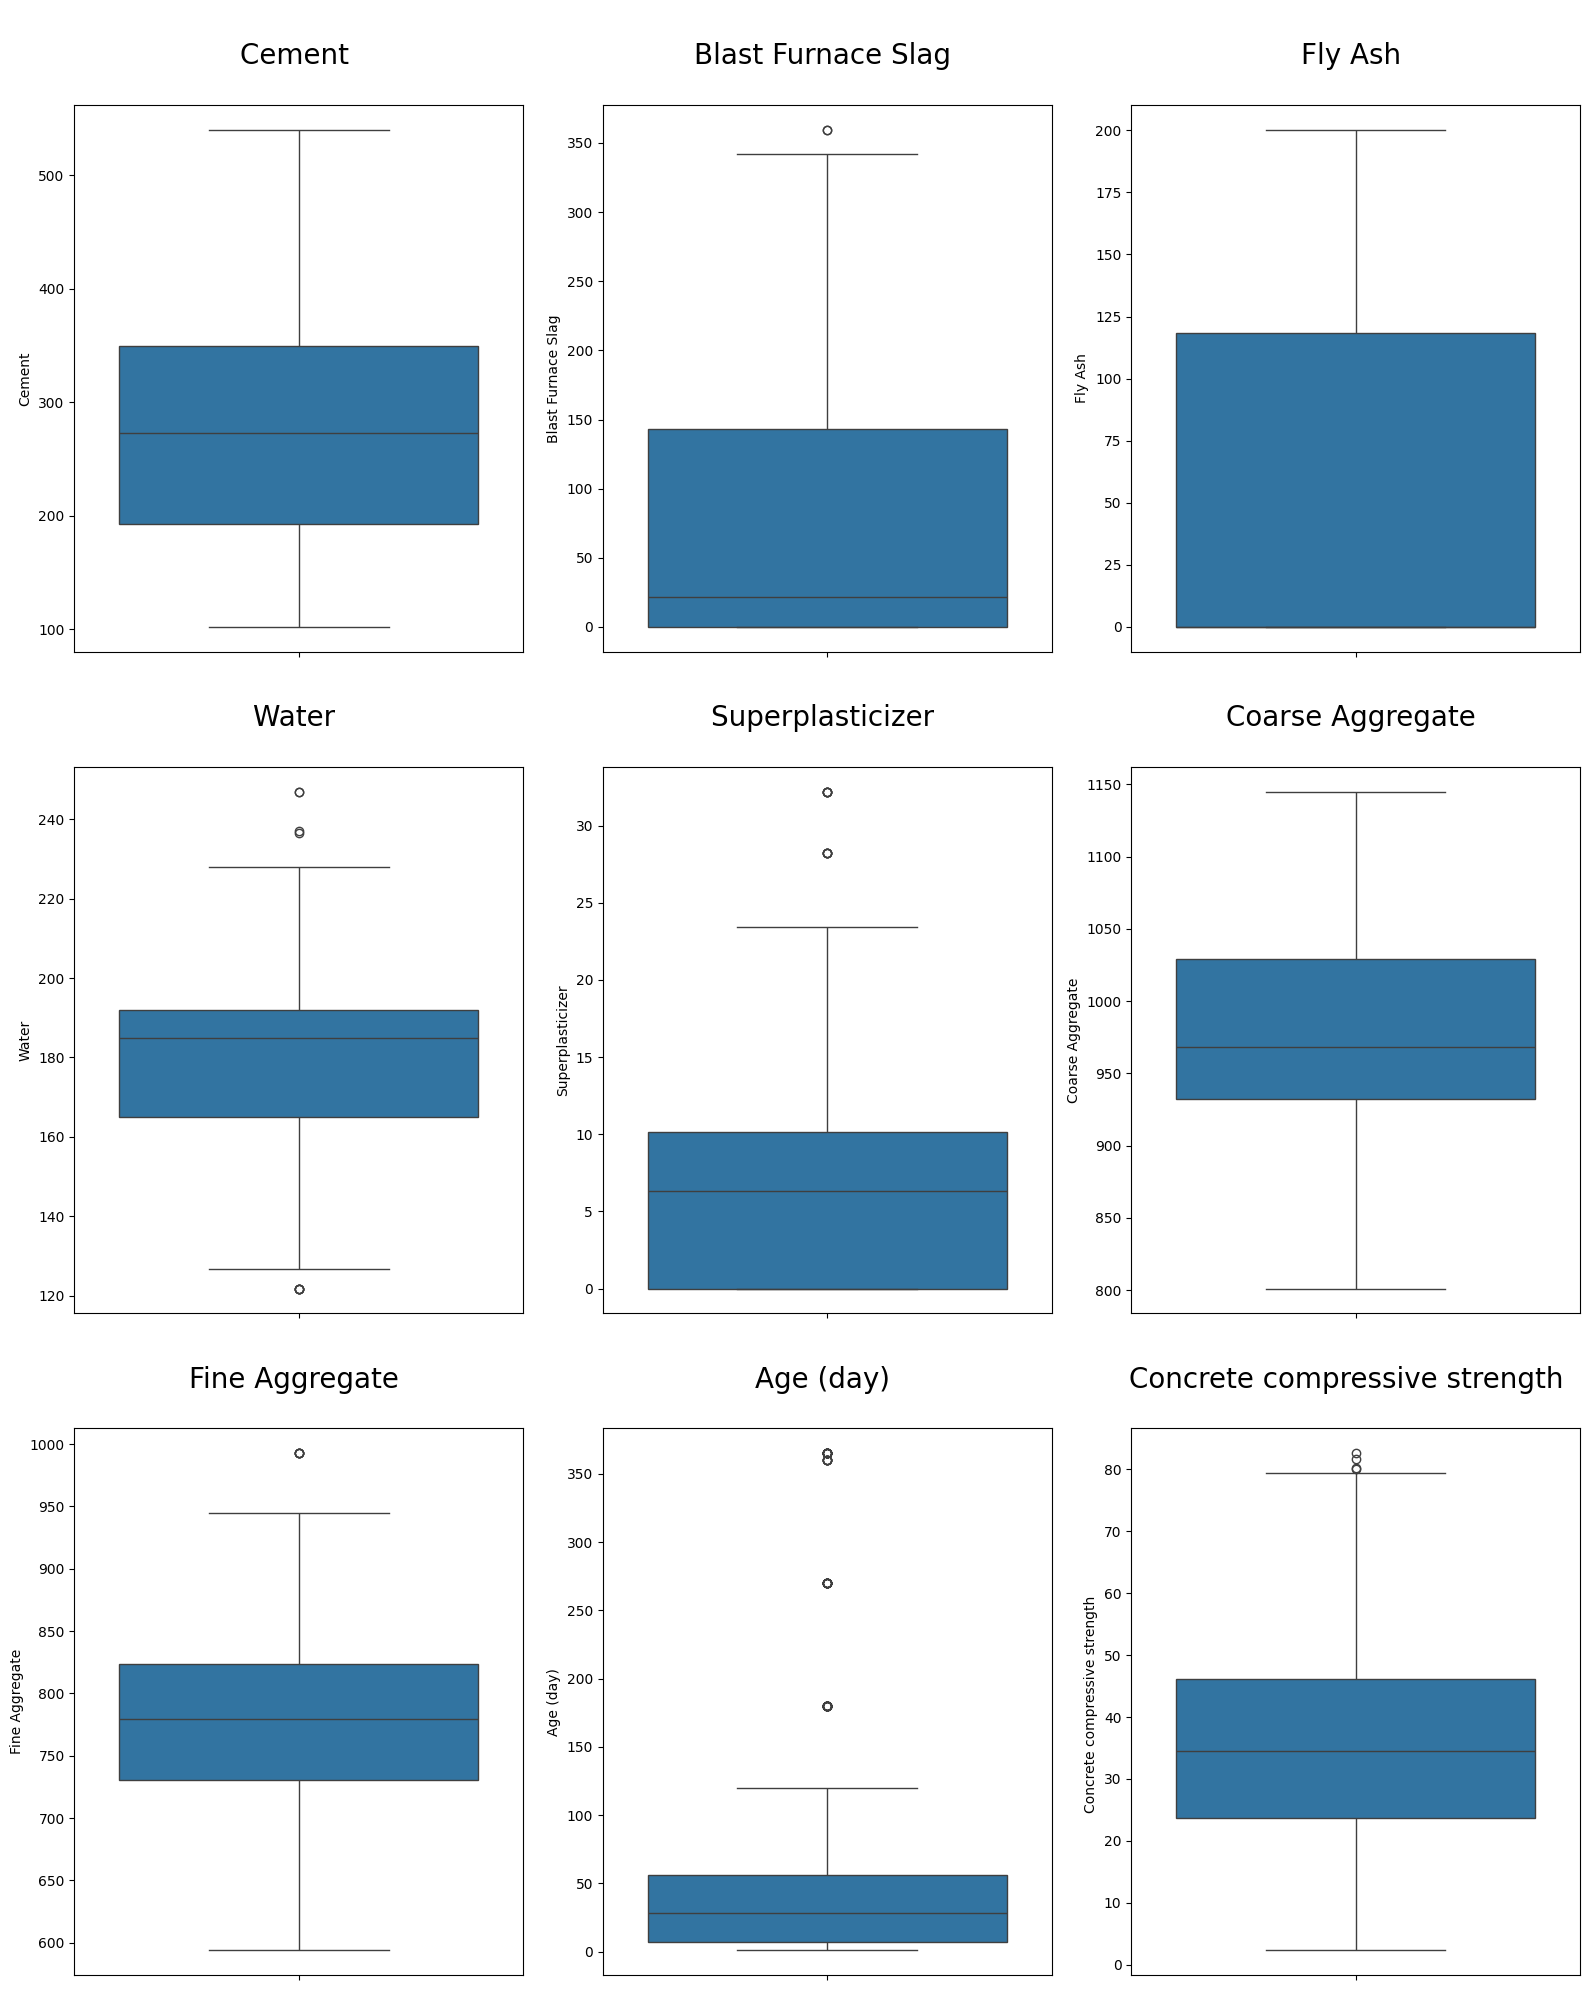

In [6]:
cols = data.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(0, len(cols)):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(y = cols[i], data = data, ax = ax)
    plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
plt.tight_layout()
plt.show()


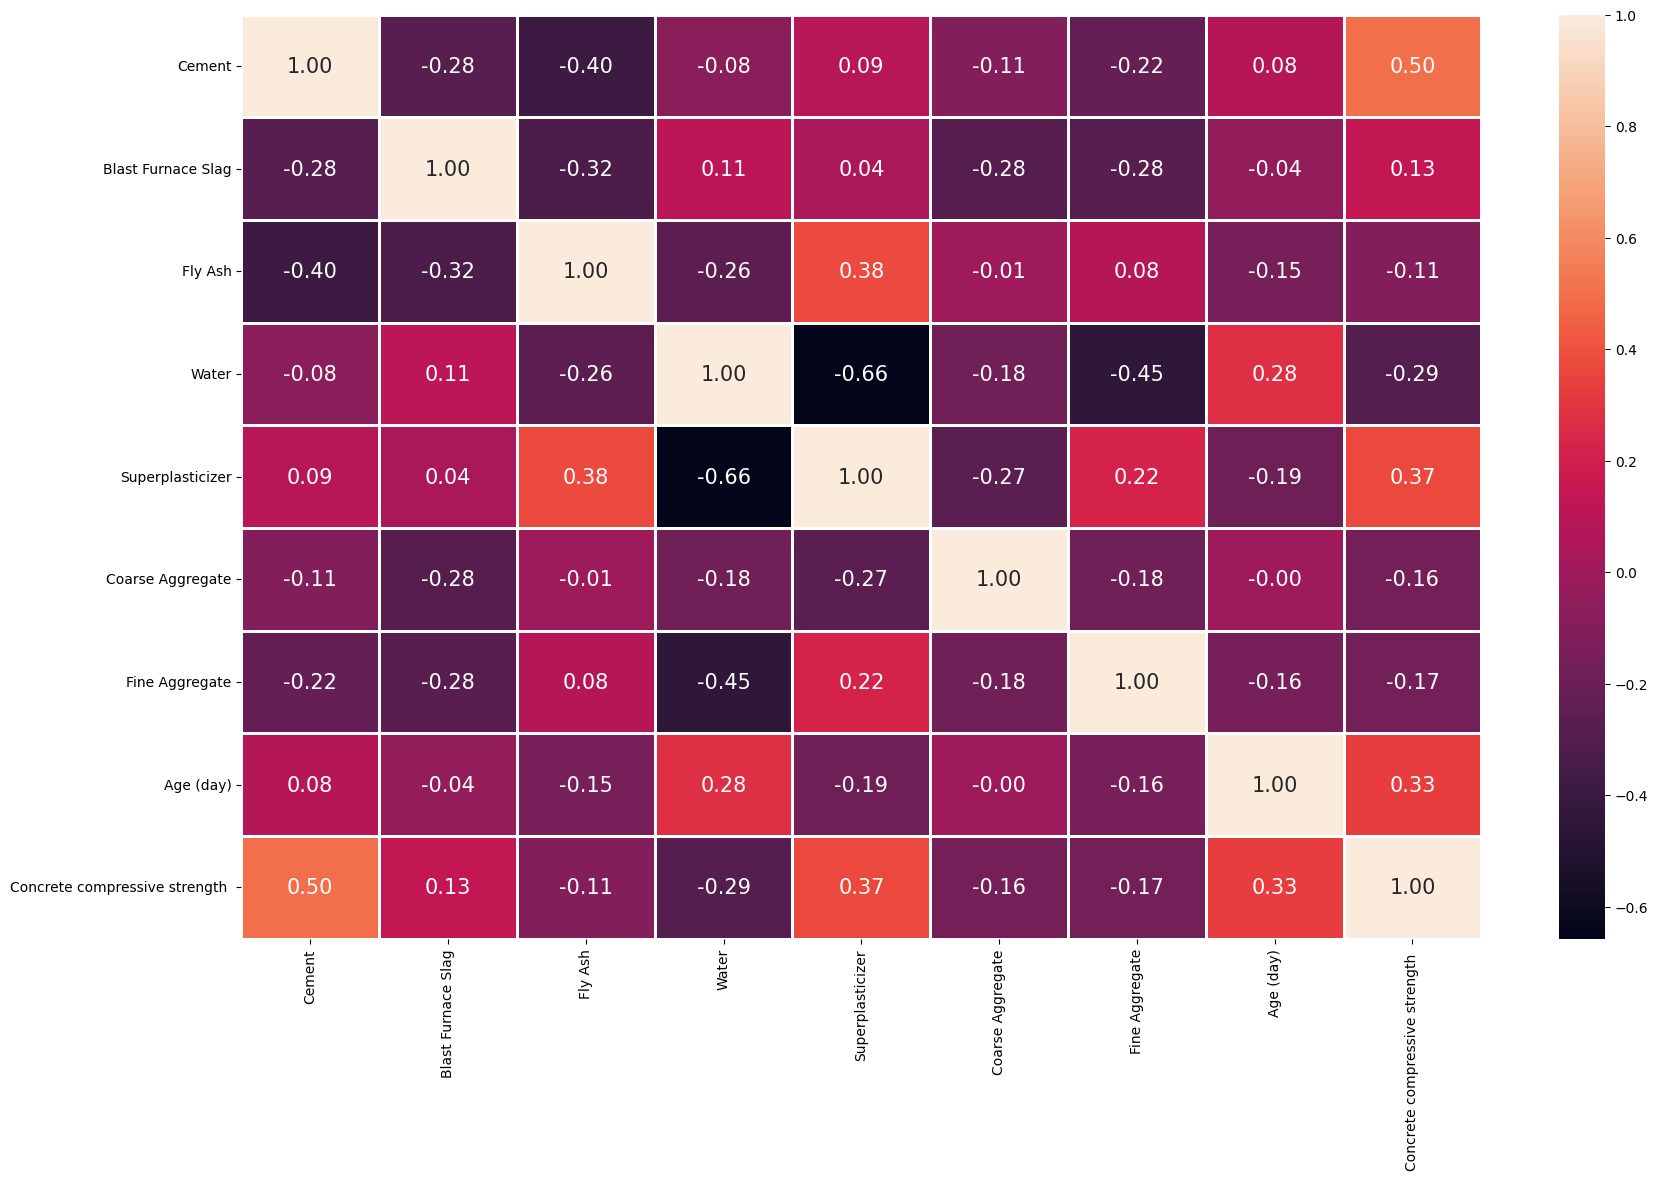

In [7]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()


In [8]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [9]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
X.var()

Cement                10921.742654
Blast Furnace Slag     7444.083725
Fly Ash                4095.548093
Water                   456.060245
Superplasticizer         35.682602
Coarse Aggregate       6045.656228
Fine Aggregate         6428.099159
Age (day)              3990.437729
dtype: float64

In [11]:
# Normalizing Features
import numpy as np
from sklearn.preprocessing import StandardScaler

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])


In [18]:
X.var()

Cement                0.143939
Blast Furnace Slag    5.816392
Fly Ash               5.641045
Water                 0.014066
Superplasticizer      1.333888
Coarse Aggregate      0.006475
Fine Aggregate        0.011292
Age (day)             1.233057
dtype: float64

# Splitting Data into train/test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Modelling

In [21]:
from sklearn import svm

svmodel = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svmodel.fit(X_train, y_train)

print("Training Score :", svmodel.score(X_train, y_train))
print("Testing Score  :", svmodel.score(X_test, y_test))

Training Score : 0.9527696205817505
Testing Score  : 0.8850192771801342


### Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print("Training Score :", rfr.score(X_train, y_train))
print("Testing Score  :", rfr.score(X_test, y_test))

Training Score : 0.9855985284122555
Testing Score  : 0.8927382419109037


## AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

print("Training Score :", ada.score(X_train, y_train))
print("Testing Score  :", ada.score(X_test, y_test))

Training Score : 0.8224878247399554
Testing Score  : 0.7180337126753302


In [39]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators' : [110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    'learning_rate' : [0.6, 1, 1.3, 1.6, 1.8, 2, 2.3, 2.6, 2.8, 3, 3.3, 3.6, 3.8],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 390 candidates, totalling 1950 fits
{'learning_rate': 1.6, 'loss': 'square', 'n_estimators': 110}
0.80126647615736
{'learning_rate': 1.6, 'loss': 'square', 'n_estimators': 110}
0.80126647615736


In [40]:
ada = AdaBoostRegressor(learning_rate = 1.6, loss = 'square', n_estimators = 110)
ada.fit(X_train, y_train)

print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.8310795280050901
0.7599171529922333


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

,criterion,'friedman_mse'
,splitter,'random'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [28]:
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

0.9649088277201905
0.8095646644840611


### XGBoost Regression

In [59]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

print("Training Score :", xgb.score(X_train, y_train))
print("Testing Score  :", xgb.score(X_test, y_test))

Training Score : 0.9970028651051555
Testing Score  : 0.9134596127795827


In [80]:
mean_squared_error(y_test, xgb.predict(X_test))

21.682282811437656

In [84]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
space = {
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),  # 0.0067 – 0.36
    'gamma': hp.uniform('gamma', 0, 5),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 0.5, 5),
    'n_estimators': hp.quniform('n_estimators', 100, 400, 1),
}


In [91]:
from sklearn.metrics import mean_squared_error
def objective(space):
    clf = XGBRegressor(
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        gamma = space['gamma'],
        min_child_weight = int(space['min_child_weight']),
        subsample = space['subsample'],
        colsample_bytree = space['colsample_bytree'],
        reg_alpha = space['reg_alpha'],
        reg_lambda = space['reg_lambda'],
        n_estimators = int(space['n_estimators']),
        seed = 0,
        device='cuda'
    )
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation)
    
    preds = clf.predict(X_test)
    accuracy = mean_squared_error(y_test, preds)    
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [90]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[0]	validation_0-rmse:15.99248	validation_1-rmse:15.07108
[0]	validation_0-rmse:15.99248	validation_1-rmse:15.07108
[1]	validation_0-rmse:15.08993	validation_1-rmse:14.30093
                                                       [1]	validation_0-rmse:15.08993	validation_1-rmse:14.30093
[2]	validation_0-rmse:14.23771	validation_1-rmse:13.55770
                                                       [2]	validation_0-rmse:14.23771	validation_1-rmse:13.55770
[3]	validation_0-rmse:13.67375	validation_1-rmse:13.07073
[3]	validation_0-rmse:13.67375	validation_1-rmse:13.07073
[4]	validation_0-rmse:12.90818	validation_1-rmse:12.44974
[5]	validation_0-rmse:12.21208	validation_1-rmse:11.83625
[4]	validation_0-rmse:12.90818	validation_1-rmse:12.44974
[5]	validation_0-rmse:12.21208	validation_1-rmse:11.83625
[6]	validation_0-rmse:11.54783	validation_1-rmse:11.29144
[7]	validation_0-rmse:10.92747	validation_1-rmse:10.80266
[6]	validation_0-rmse:11.54783	validation_1-rmse:11.29144
[7]	validation_0-rms

KeyboardInterrupt: 

In [63]:
best_hyperparams

{'colsample_bytree': np.float64(0.6825540496578383),
 'gamma': np.float64(8.97574627651682),
 'max_depth': np.float64(8.0),
 'min_child_weight': np.float64(6.0),
 'reg_alpha': np.float64(180.0),
 'reg_lambda': np.float64(0.9958706370030961)}

In [70]:
xgb_obt = XGBRegressor(booster = 'gbtree', learning_rate = 0.1,
                        max_depth = int(best_hyperparams['max_depth']), n_estimators = 200, gamma=best_hyperparams['gamma'],
                        colsample_bytree=best_hyperparams['colsample_bytree'], min_child_weight=best_hyperparams['min_child_weight'],
                        reg_alpha=best_hyperparams['reg_alpha'], reg_lambda=best_hyperparams['reg_lambda'])
xgb_obt.fit(X_train, y_train)

print("Training Score :", xgb_obt.score(X_train, y_train))
print("Testing Score  :", xgb_obt.score(X_test, y_test))

Training Score : 0.9086209688115084
Testing Score  : 0.843773883487509


In [72]:
%pip install thundersvm


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.svm import SVR
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

model = SVR(kernel='linear', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

print("Training Score :", model.score(X_train, y_train))
print("Testing Score  :", model.score(X_test, y_test))

Training with linear kernel
Training Score linear: 55.831621583292005
Testing Score  linear: 56.96128999340954
Training with poly kernel
Training Score poly: 26.367296987392066
Testing Score  poly: 51.005682150278744
Training with rbf kernel
Training Score rbf: 13.594397810982361
Testing Score  rbf: 28.807873758342428
Training with sigmoid kernel
Training Score sigmoid: 264457.3872326059
Testing Score  sigmoid: 285478.56123490684
Training with precomputed kernel
Training Score rbf: 13.594397810982361
Testing Score  rbf: 28.807873758342428
Training with sigmoid kernel
Training Score sigmoid: 264457.3872326059
Testing Score  sigmoid: 285478.56123490684
Training with precomputed kernel


ValueError: Precomputed matrix must be a square matrix. Input is a 772x8 matrix.

## Hyperparameter Optimization

In [36]:
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH

def get_configspace():
    cs = CS.ConfigurationSpace()

    cs.add_hyperparameters([
        CSH.UniformFloatHyperparameter("learning_rate", lower=0.01, upper=0.3, log=True),
        CSH.UniformIntegerHyperparameter("max_depth", lower=3, upper=15),
        CSH.UniformIntegerHyperparameter("n_estimators", lower=50, upper=300),
        CSH.UniformFloatHyperparameter("gamma", lower=0.0, upper=5.0),
    ])
    return cs


In [38]:
import hpbandster.core.nameserver as hpns
from hpbandster.core.worker import Worker
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

class XGBWorker(Worker):
    def __init__(self, X_train, X_test, y_train, y_test, **kwargs):
        super().__init__(**kwargs)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def compute(self, config, budget, **kwargs):
        # budget (Hyperband) usually equals n_estimators
        n_estimators = int(budget)

        model = XGBRegressor(
            learning_rate=config["learning_rate"],
            max_depth=int(config["max_depth"]),
            n_estimators=n_estimators,
            gamma=config["gamma"]
        )

        model.fit(self.X_train, self.y_train)

        preds = model.predict(self.X_test)
        score = r2_score(self.y_test, preds)

        return {"loss": 1 - score, "info": {"score": score}}


In [39]:
from hpbandster.optimizers import BOHB
import logging

def run_bohb(X_train, X_test, y_train, y_test, max_budget=300, min_budget=30, n_iterations=20):

    NS = hpns.NameServer(run_id="xgb_bohb", host="localhost", port=None)
    NS.start()

    worker = XGBWorker(X_train=X_train, 
                       X_test=X_test,
                       y_train=y_train, 
                       y_test=y_test,
                       run_id="xgb_bohb")
    worker.run(background=True)

    cs = get_configspace()

    bohb = BOHB(
        configspace=cs,
        run_id="xgb_bohb",
        min_budget=min_budget,
        max_budget=max_budget
    )

    result = bohb.run(n_iterations=n_iterations)
    bohb.shutdown(shutdown_workers=True)
    NS.shutdown()

    return result


In [40]:
result = run_bohb(X_train, X_test, y_train, y_test)

id2config = result.get_id2config_mapping()
best_id = result.get_best_id()

print("Best Config:", id2config[best_id]["config"])
print("Best Score:", 1 - result.get_runs_by_id(best_id)[-1].loss)

20:31:35 wait_for_workers trying to get the condition
20:31:35 DISPATCHER: started the 'discover_worker' thread
20:31:35 DISPATCHER: started the 'job_runner' thread
20:31:35 DISPATCHER: Pyro daemon running on localhost:40809
20:31:35 DISPATCHER: Starting worker discovery
20:31:35 DISPATCHER: started the 'discover_worker' thread
20:31:35 DISPATCHER: started the 'job_runner' thread
20:31:35 DISPATCHER: Pyro daemon running on localhost:40809
20:31:35 DISPATCHER: Starting worker discovery
20:31:35 DISPATCHER: Found 0 potential workers, 0 currently in the pool.
20:31:35 DISPATCHER: Finished worker discovery
20:31:35 DISPATCHER: jobs to submit = 0, number of idle workers = 0 -> waiting!
20:31:35 HBMASTER: only 0 worker(s) available, waiting for at least 1.
20:31:35 DISPATCHER: Found 0 potential workers, 0 currently in the pool.
20:31:35 DISPATCHER: Finished worker discovery
20:31:35 DISPATCHER: jobs to submit = 0, number of idle workers = 0 -> waiting!
20:31:35 HBMASTER: only 0 worker(s) ava

KeyboardInterrupt: 